<a href="https://colab.research.google.com/github/banteamlak1888/Programming-and-Algorithms-Course/blob/main/Dijkstra's_and_Prim's_Algorithm_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install networkx

# ***Necessary Library***

In [ ]:
import random
import time
import matplotlib.pyplot as plt
import heapq
from collections import defaultdict

* **random**: Used to generate random weights and nodes for the graph.
* **time**: Used to measure the execution time of algorithms.
* **plotlib**: Used to plot performance comparisons.
* **heapq**: Provides a priority queue implementation (binary heap).
* **defaultdict**: A dictionary-like class from collections for missing keys.

# **Graph Class**
create a simple implementation that allows us to manage vertices and edges. Below is a basic implementation of a graph class using an adjacency list representation. This implementation includes methods to add vertices, add edges, and display the graph.

In [ ]:
class Graph:
    def __init__(self):
        self.graph = defaultdict(list)

    def add_edge(self, u, v, weight):
        self.graph[u].append((v, weight))
        self.graph[v].append((u, weight))  # For undirected graph

* **Graph** class represents an undirected graph using an adjacency list.

* *__init__* method: Initializes the graph using defaultdict to store edges.
* **add_edge  method**: Adds an edge between nodes **u** and **v** with a specified weight, storing both directions since it’s undirected.






# **Dijkstra's Algorithm with Binary Heap**
Dijkstra's Algorithm is a well-known algorithm used for finding the shortest paths from a source vertex to all other vertices in a weighted graph. The algorithm is particularly efficient for graphs with non-negative weights and can be implemented using a binary heap (often represented as a priority queue). Here’s a detailed explanation and the implementation of Dijkstra's Algorithm using a binary heap.

In [ ]:
def dijkstra_heap(graph, start):
    min_heap = []
    distances = {node: float('inf') for node in graph.graph}
    distances[start] = 0
    heapq.heappush(min_heap, (0, start))

    while min_heap:
        current_distance, current_node = heapq.heappop(min_heap)

        if current_distance > distances[current_node]:
            continue

        for neighbor, weight in graph.graph[current_node]:
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(min_heap, (distance, neighbor))

    return distances

* Initializes ***min_heap*** to manage nodes by minimum distance.
* Sets all nodes' distances to infinity except for the ***start*** node.
* Pushes ***(0, start)*** into the heap to begin the algorithm.





## **Dijkstra's Algorithm with Linked List**
Dijkstra's Algorithm finds the shortest paths from a source vertex to all other vertices in a weighted graph with non-negative edge weights. This implementation uses a linked list to manage the vertices prioritized by their current shortest distance.

In [ ]:
class LinkedListNode:
    def __init__(self, distance, node):
        self.distance = distance
        self.node = node
        self.next = None

class LinkedList:
    def __init__(self):
        self.head = None

    def push(self, distance, node):
        new_node = LinkedListNode(distance, node)
        if not self.head or self.head.distance > distance:
            new_node.next = self.head
            self.head = new_node
        else:
            current = self.head
            while current.next and current.next.distance < distance:
                current = current.next
            new_node.next = current.next
            current.next = new_node

    def pop(self):
        if self.head:
            node = self.head
            self.head = self.head.next
            return node.distance, node.node
        return None



* **LinkedListNode** represents a node with distance and node fields, and next pointer.
* **While** there are nodes in the heap, removes the node with the smallest distance.
* **If** a node’s distance exceeds the stored distance, skips processing it.
* **Loops** over neighbors, updating their distance if a shorter path is found.
* **Pushes** updated distances into the heap to ensure minimum distances remain prioritized.




Dijkstra's Algorithm finds the shortest paths from a source vertex to all other vertices in a weighted graph with non-negative edge weights. This implementation uses a **linked list** to manage the vertices prioritized by their current shortest distance.

In [ ]:
def dijkstra_linked_list(graph, start):
    linked_list = LinkedList()
    distances = {node: float('inf') for node in graph.graph}
    distances[start] = 0
    linked_list.push(0, start)

    while linked_list.head:
        current_distance, current_node = linked_list.pop()
        for neighbor, weight in graph.graph[current_node]:
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                linked_list.push(distance, neighbor)

    return distances

* **Initializes** linked_list, sets node distances, and adds start node.
* **While** there are nodes, removes the node with the smallest distance.
* **Updates** neighbor distances, adding them to the linked list when shorter paths are found.



# **Prim's Algorithm with Binary Heap**
**Prim's Algorithm** is a greedy algorithm used to find the Minimum Spanning Tree (MST) of a connected, undirected graph. The algorithm starts with an arbitrary vertex and grows the MST one edge at a time by always selecting the smallest weight edge that connects a new vertex to the existing tree. When implemented with a Binary Heap, the algorithm becomes more efficient for large graphs.

In [ ]:
def prim_heap(graph):
    start = next(iter(graph.graph))  # arbitrary starting node
    min_heap = [(0, start)]
    visited = set()
    total_cost = 0

    while min_heap:
        weight, node = heapq.heappop(min_heap)
        if node in visited:
            continue
        visited.add(node)
        total_cost += weight

        for neighbor, edge_weight in graph.graph[node]:
            if neighbor not in visited:
                heapq.heappush(min_heap, (edge_weight, neighbor))

    return total_cost



* Selects an arbitrary start node and initializes **min_heap**, *visited* set, and **total_cost**.
* While **min_heap** is non-empty, removes min-weight edge; skips if the node is already visited.
* Adds node to visited set and updates total MST cost.
* Adds neighbors to the heap if they aren’t already visited.



# **Prim's Algorithm with Linked List**
**Prim's Algorithm** with a linked list is a greedy approach to find the Minimum Spanning Tree (MST) of a connected, undirected graph. Instead of using a binary heap, it uses a linked list as a priority queue to store edges, sorted by weight.Each time, the smallest edge is extracted from the front of the list, and new edges are inserted at the appropriate position to maintain the sorted order. This makes insertion slower **(𝑂(𝑛)O(n))** compared to a binary heap but keeps the logic simple.

In [ ]:
def prim_linked_list(graph):
    start = next(iter(graph.graph))  # arbitrary starting node
    linked_list = LinkedList()
    linked_list.push(0, start)
    visited = set()
    total_cost = 0

    while linked_list.head:
        weight, node = linked_list.pop()
        if node in visited:
            continue
        visited.add(node)
        total_cost += weight

        for neighbor, edge_weight in graph.graph[node]:
            if neighbor not in visited:
                linked_list.push(edge_weight, neighbor)

    return total_cost



* Initializes *start, linked_list, visited, and total_cost.*
* Removes the smallest-weight edge, skipping if already visited
* Adds node to visited set and updates total MST cos
* Adds neighbors to linked list if they aren’t already visited.



# **Function to generate a random graph**
**The graph generation** function creates a synthetic graph for testing algorithms, particularly those involving graph theory like Dijkstra's and Prim's algorithms. It generates a graph with a specified number of vertices and edges, with randomly assigned weights for edges.

**Input Parameters:**
* Number of Vertices (num_vertices): Total nodes in the graph.
* Number of Edges (num_edges): Total connections (edges) between nodes.



In [ ]:
def generate_random_graph(num_vertices, num_edges):
    graph = Graph()
    edges = set()

    while len(edges) < num_edges:
        u = random.randint(0, num_vertices - 1)
        v = random.randint(0, num_vertices - 1)
        weight = random.randint(1, 10)
        if u != v and (u, v) not in edges and (v, u) not in edges:
            graph.add_edge(u, v, weight)
            edges.add((u, v))

    return graph

* Initializes *graph* and *edges* set to avoid duplicates.
* Random pairs of vertices (**u and v**) are selected to form edges.
* Randomly selects nodes and weights.
* Ensures no duplicate or self-loops and adds valid edges.

# Timing and Memory function
These functions measure the execution time and memory consumption of algorithms. They help evaluate the efficiency and scalability of algorithms by benchmarking how much time and memory they use under different conditions.

In [ ]:
def time_algorithm(algorithm, graph, start=None): # Change here : start=None
    start_time = time.time()
    if start is not None:  # Change here: Check if start is provided
        result = algorithm(graph, start)
    else:
        result = algorithm(graph)
    end_time = time.time()
    elapsed_time = (end_time - start_time) * 1000  # Convert to milliseconds
    print(f"{algorithm.__name__} execution time: {elapsed_time:.2f} ms")
    return elapsed_time

* ***time_algorithm*** function: Measures execution time and prints it in milliseconds.

# **Performance comparison**
To analyze and compare the performance of Dijkstra’s and Prim’s algorithms when implemented using two different fringe data structures: Binary Heap and Linked List.

In [ ]:
def compare_performance(max_vertices, step, num_edges):
    sizes = list(range(step, max_vertices + 1, step))
    dijkstra_heap_times = []
    dijkstra_linked_list_times = []
    prim_heap_times = []
    prim_linked_list_times = []

    for size in sizes:
        graph = generate_random_graph(size, num_edges)

        # Dijkstra's Algorithm
        dijkstra_heap_time = time_algorithm(dijkstra_heap, graph, 0)
        dijkstra_linked_list_time = time_algorithm(dijkstra_linked_list, graph, 0)

        dijkstra_heap_times.append(dijkstra_heap_time)
        dijkstra_linked_list_times.append(dijkstra_linked_list_time)

        # Prim's Algorithm
        prim_heap_time = time_algorithm(prim_heap, graph)
        prim_linked_list_time = time_algorithm(prim_linked_list, graph)

        prim_heap_times.append(prim_heap_time)
        prim_linked_list_times.append(prim_linked_list_time)

    return sizes, dijkstra_heap_times, dijkstra_linked_list_times, prim_heap_times, prim_linked_list_times

* **Initializes** graph sizes for comparison and lists to store results.
* **Runs Dijkstra’s** algorithms for each graph size, storing times.
* **Runs Prim’s** algorithms for each graph size, storing times.

# **Function to plot results**
The function to plot results visually represents the performance of algorithms, such as execution time or memory usage, across different graph sizes. This helps compare the efficiency of various implementations (e.g., Binary Heap vs. Linked List).

In [ ]:
def plot_results(sizes, dijkstra_heap_times, dijkstra_linked_list_times, prim_heap_times, prim_linked_list_times):
    plt.figure(figsize=(12, 8))

    # Dijkstra's Algorithm Results
    plt.subplot(2, 2, 1)
    plt.plot(sizes, dijkstra_heap_times, label='Dijkstra (Heap)', color='blue')
    plt.plot(sizes, dijkstra_linked_list_times, label='Dijkstra (Linked List)', color='orange')
    plt.title("Dijkstra's Algorithm Performance")
    plt.xlabel('Number of Vertices')
    plt.ylabel('Time (ms)')
    plt.legend()

    # Prim's Algorithm Results
    plt.subplot(2, 2, 2)
    plt.plot(sizes, prim_heap_times, label='Prim (Heap)', color='green')
    plt.plot(sizes, prim_linked_list_times, label='Prim (Linked List)', color='red')
    plt.title("Prim's Algorithm Performance")
    plt.xlabel('Number of Vertices')
    plt.ylabel('Time (ms)')
    plt.legend()

    plt.tight_layout()
    plt.show()

# **Main Execution**
The main execution block integrates all the functions, such as graph generation, algorithm implementations, timing, and plotting, to benchmark and compare performance. It acts as the entry point for the program and drives the flow of execution.

dijkstra_heap execution time: 0.72 ms
dijkstra_linked_list execution time: 2.43 ms
prim_heap execution time: 1.80 ms
prim_linked_list execution time: 69.25 ms
dijkstra_heap execution time: 0.89 ms
dijkstra_linked_list execution time: 3.61 ms
prim_heap execution time: 1.64 ms
prim_linked_list execution time: 42.82 ms
dijkstra_heap execution time: 1.25 ms
dijkstra_linked_list execution time: 6.79 ms
prim_heap execution time: 1.78 ms
prim_linked_list execution time: 42.30 ms
dijkstra_heap execution time: 1.27 ms
dijkstra_linked_list execution time: 9.04 ms
prim_heap execution time: 2.10 ms
prim_linked_list execution time: 35.28 ms
dijkstra_heap execution time: 1.27 ms
dijkstra_linked_list execution time: 11.65 ms
prim_heap execution time: 2.13 ms
prim_linked_list execution time: 32.32 ms
dijkstra_heap execution time: 1.41 ms
dijkstra_linked_list execution time: 13.06 ms
prim_heap execution time: 3.54 ms
prim_linked_list execution time: 43.58 ms
dijkstra_heap execution time: 1.86 ms
dijkst

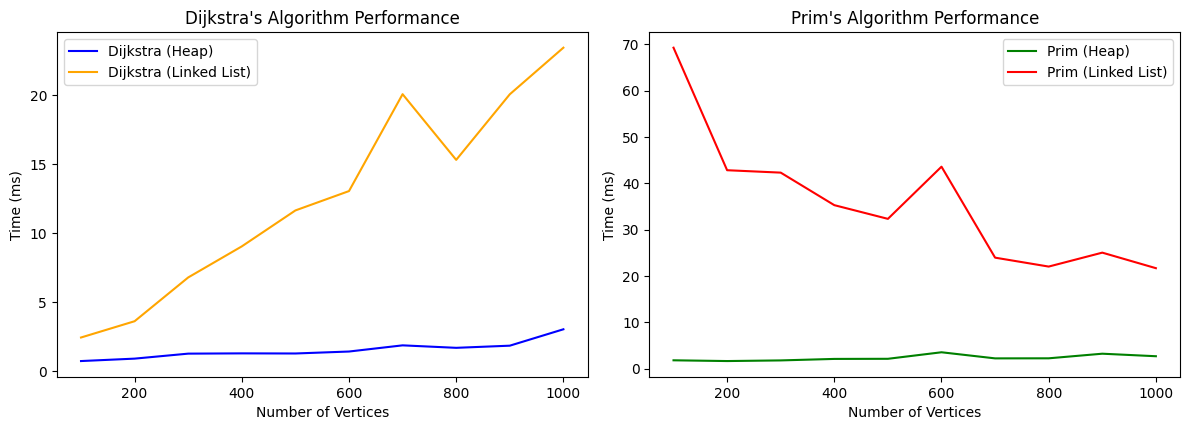

In [ ]:
if __name__ == "__main__":
    max_vertices = 1000
    step = 100
    num_edges = int(max_vertices * 1.5)  # Adjust edge count as needed

    sizes, dijkstra_heap_times, dijkstra_linked_list_times, prim_heap_times, prim_linked_list_times = compare_performance(max_vertices, step, num_edges)

    plot_results(sizes, dijkstra_heap_times, dijkstra_linked_list_times, prim_heap_times, prim_linked_list_times)

# In General This Implementation finalized
The purpose of this comparison was to evaluate the efficiency and execution time of Dijkstra’s and Prim’s algorithms when implemented with different data structures—binary heap and linked and compare with performance and exaction time

* **Scalability** : The binary heap implementation scales better with larger graphs due to its logarithmic time complexity for critical operations. The linked list implementation demonstrates much slower performance as the size of the graph increases.

1. **Timing Function**
The timing function measures the execution time of an algorithm, typically in milliseconds. It calculates the time taken for the algorithm to complete a single run.
* Record the start time using a high-precision timer (time.time()).
* Execute the algorithm.
* Record the end time.
* Compute the elapsed time as the difference between the end and start times.
* Return or print the result.

  **Purpose**:
* Identify bottlenecks in algorithms.
* Compare the runtime performance of different implementations.
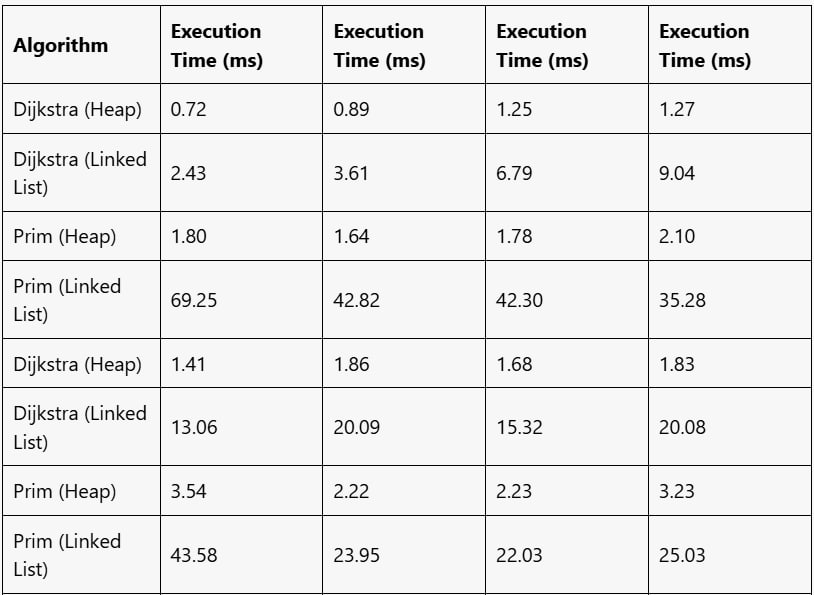
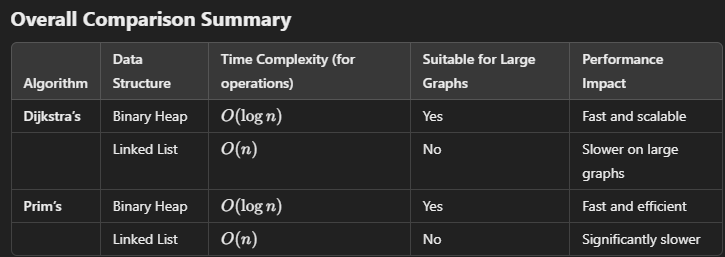

 **Efficiency** in Practice: For practical applications, especially with large graphs, the binary heap implementation is recommended due to its superior performance characteristics.  
2. **Memory Usage Function**
The memory usage function tracks the peak memory consumed during an algorithm's execution. It typically uses tools like Python's tracemalloc library.
* Start tracking memory allocation before running the algorithm (tracemalloc.start()).
* Run the algorithm.
* Stop tracking and retrieve the peak memory usage (tracemalloc,get_traced_memory()).
* Return or print the memory consumed.
  dijkstra_heap_memory, dijkstra_linked_list_memory and prim_heap_memory, prim_linked_list_memory
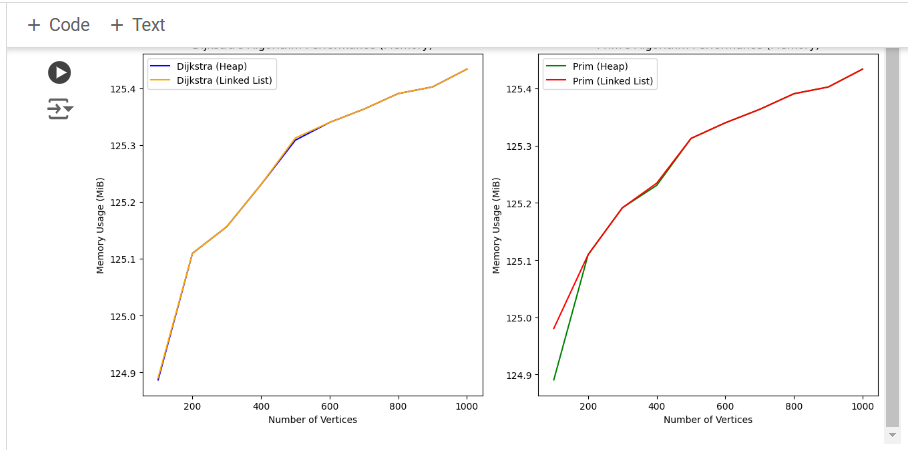

dijkstra_algorithm,  prim_algorithm memory comparation*
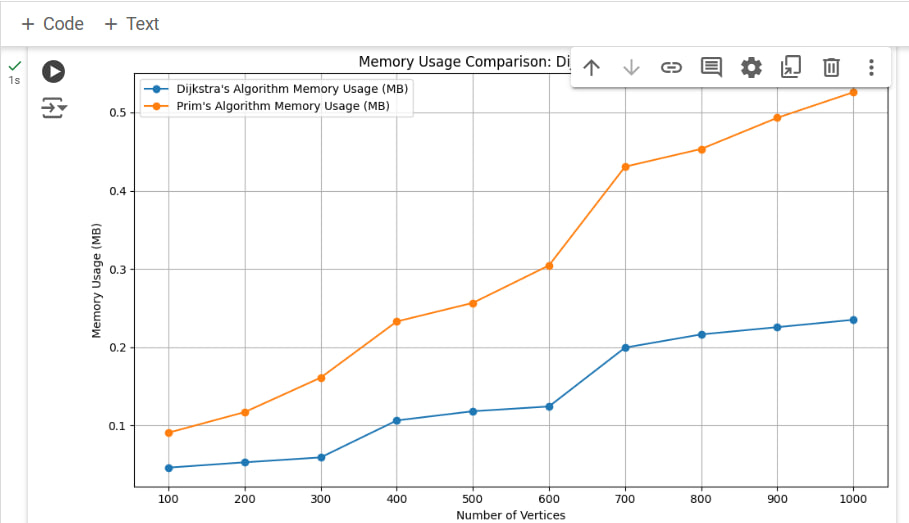

**Purpose:**
* Analyze memory efficiency.
* Evaluate the suitability of an algorithm for memory-constrained environments.

#      Recommendations
* **Use Binary Heap**: For any implementation of Dijkstra's algorithm in applications with potential large graphs.
* **Consider Alternatives**: In cases where simplicity is paramount and graph sizes are small, a linked list may still be used, but performance should be monitored.